# 🎬✨ Netflix Data Case Study 📊🔍

![Netflix Recommendation Engine](https://static.startuptalky.com/2021/12/Netflix-Recommendation-Engine-Working-StartupTalky.jpg)

## 📁 1. Dataset Overview 📄

### Libraries import 

In [1]:
import pandas as pd
import numpy as np

### Import of dataset

In [2]:
url = "https://raw.githubusercontent.com/neerajcodes888/Data-Science/main/Case%20Study/Netflix%20Case%20Study/netflix.csv"
data = pd.read_csv(url)

In [3]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### What is the shape of the dataset?

In [4]:
data.shape

(8807, 12)

###  What are the types of columns and their missing values?

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
data.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### How many unique titles exist?

In [8]:
data['title'].unique()

array(['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', ...,
       'Zombieland', 'Zoom', 'Zubaan'], shape=(8807,), dtype=object)

### What is the overall distribution of content type (Movie vs TV Show)?

In [9]:
data['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [10]:
cat = data['type'].value_counts(normalize=True)*100

In [11]:
cat

type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64

In [12]:
round(cat,2)
cat = round(cat,2)

#### Clearly can be seen , here movies shows are more available than TV shows

### Let's visualize for more clarity

In [13]:
import matplotlib.pyplot as plt

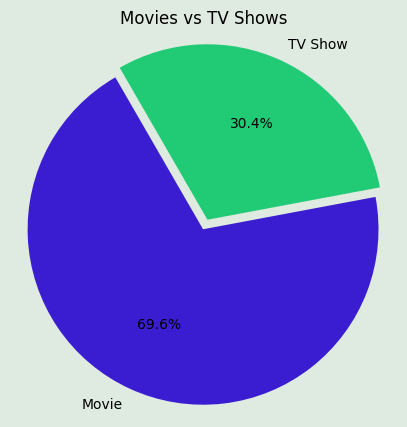

In [14]:
plt.figure(figsize=(5,5),facecolor="#CDDECF9F")
plt.pie(cat, labels=cat.index, autopct='%1.1f%%', startangle=120 ,colors=["#3b1dd1","#21cb76"], explode=(0.04, 0.02))
plt.title("Movies vs TV Shows")
plt.axis("equal")
plt.savefig('MVT.png')
plt.show()

##  🧹 2. Data Cleaning & Feature Engineering

#### - How many missing values are there in `director`, `cast`, `country`?|

In [15]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [16]:
data.dropna().head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [17]:
data.dropna(inplace=True)

In [18]:
data.shape

(5332, 12)

In [19]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### - Can we extract `month` and `year` from `date_added`?

In [20]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [21]:
date_converted = pd.to_datetime(data['date_added'].str.strip())


##### Making Sure there is no trailing space like 'September 24, 2021' . here after September space and then 24, space 2021. That's why str.strip used to avoid spaces.

In [22]:
date_converted

7      2021-09-24
8      2021-09-24
9      2021-09-24
12     2021-09-23
24     2021-09-21
          ...    
8801   2016-03-09
8802   2019-11-20
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 5332, dtype: datetime64[ns]

#### - Now the questions ---  Can we extract `month` and `year` from `date_added`? 
####  _ yes, we can create

In [23]:
data['Month'] = date_converted.dt.month

In [24]:
data['Year'] = date_converted.dt.year

In [25]:
dd = date_converted.dt.day

In [26]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Year
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,2021


### - Converting duration to numeric (e.g., minutes or seasons)

In [27]:
data['duration'].dtype

dtype('O')

In [28]:
def convert_duration(dur):
    dur = str(dur).lower().strip()
    if 'min' in dur:
        return int(dur.split()[0])
    elif 'season' in dur:
        return int(dur.split()[0])*40
    else:
        return None
    

In [29]:
data['duration'] = data['duration'].apply(convert_duration) 

In [30]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Year
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,360,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,2021


#### How has Netflix content changed over the years?

In [31]:
content_years=data.groupby('Year')['show_id'].count().sort_values(ascending=False)

In [32]:
content_years

Year
2019    1265
2020    1194
2018    1101
2021     755
2017     724
2016     202
2015      50
2014      14
2011      13
2013       7
2012       3
2009       2
2010       1
2008       1
Name: show_id, dtype: int64

In [33]:
content_years.sort_index()

Year
2008       1
2009       2
2010       1
2011      13
2012       3
2013       7
2014      14
2015      50
2016     202
2017     724
2018    1101
2019    1265
2020    1194
2021     755
Name: show_id, dtype: int64

#### Let's plot for this!!!

In [34]:
plt.figure(figsize=(6,6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

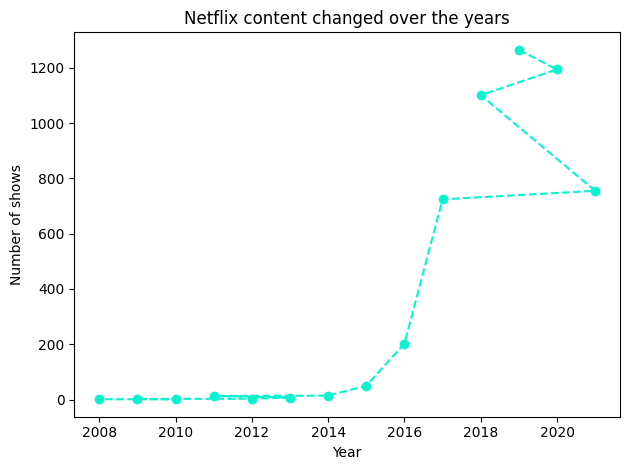

In [35]:
plt.plot(content_years.index, content_years.values, marker='o', linestyle='--',color="#09F3D0")
plt.title("Netflix content changed over the years")
plt.xlabel("Year")
plt.ylabel("Number of shows")
plt.tight_layout()

In [36]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Year
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,360,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,2021


### - What is the trend in adding new content per year?

In [37]:
content_years.sort_index()

Year
2008       1
2009       2
2010       1
2011      13
2012       3
2013       7
2014      14
2015      50
2016     202
2017     724
2018    1101
2019    1265
2020    1194
2021     755
Name: show_id, dtype: int64

#### As we can see this , the huge drop was in year 2012 and after that 2020.

### - Which month sees the most releases?

In [38]:
import calendar


In [39]:
mmm = data.groupby(data['Month'].apply(lambda x:calendar.month_name[x]))['release_year'].count()

In [40]:
mmm.sort_values(ascending=False).idxmax()

'October'

In [41]:
plt.figure(figsize=(6,6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'April'),
  Text(1, 0, 'August'),
  Text(2, 0, 'December'),
  Text(3, 0, 'February'),
  Text(4, 0, 'January'),
  Text(5, 0, 'July'),
  Text(6, 0, 'June'),
  Text(7, 0, 'March'),
  Text(8, 0, 'May'),
  Text(9, 0, 'November'),
  Text(10, 0, 'October'),
  Text(11, 0, 'September')])

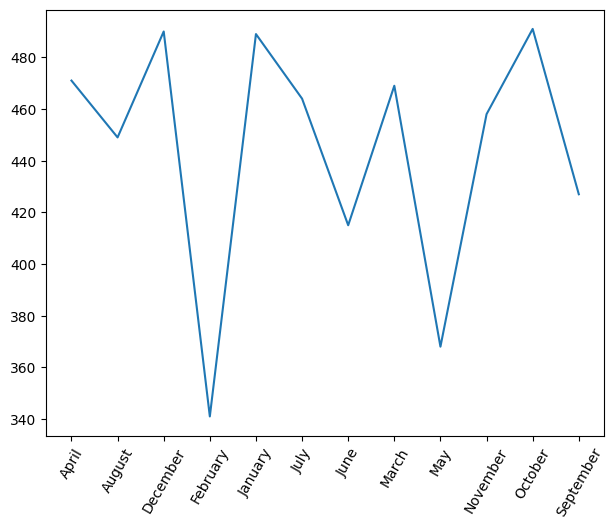

In [42]:
plt.plot(mmm.index,mmm.values)
plt.tight_layout()
plt.xticks(rotation=60, fontsize=10)

## 📚 4. Content-Based Insights

#### - Which genres are most common on Netflix?

In [43]:
data['listed_in'].unique()

array(['Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Dramas, International Movies',
       'Comedies, International Movies, Romantic Movies', 'Comedies',
       'Horror Movies, Sci-Fi & Fantasy', 'Thrillers',
       'Action & Adventure, Dramas',
       'Action & Adventure, Classic Movies, Dramas',
       'Dramas, Horror Movies, Thrillers',
       'Action & Adventure, Horror Movies, Thrillers',
       'Action & Adventure', 'Dramas, Thrillers',
       'Action & Adventure, Anime Features, International Movies',
       'Action & Adventure, Comedies, Dramas',
       'Sci-Fi & Fantasy, Thrillers',
       'Children & Family Movies, Comedies',
       'Documentaries, Music & Musicals',
       'Children & Family Movies, Dramas',
       'Dramas, International Movies, Thrillers',
       'Dramas, Romantic Movies', 'Comedies, Dramas, Independent Movies',
       'Dramas, International Movies, Romantic Movies', 'Dramas',
       '

In [44]:
data['listed_in'].str.split(' ').explode().value_counts().sort_values(ascending=False)

listed_in
Movies              2912
International       2456
Movies,             2048
Dramas,             2008
&                   1927
Comedies,           1219
Action               819
Independent          740
Adventure,           685
Romantic             600
Thrillers            550
Family               503
Children             503
Comedies             364
Horror               341
Dramas               337
TV                   322
Comedy               305
Stand-Up             305
Music                292
Musicals             269
Sci-Fi               240
Documentaries,       225
Fantasy              203
Shows,               167
Documentaries        166
Sports               156
Adventure            134
Classic              111
LGBTQ                 80
Cult                  72
Anime                 71
Features,             60
Faith                 58
Shows                 39
Crime                 38
Fantasy,              37
Spirituality          33
Spirituality,         25
Musicals,      

In [45]:
data['listed_in'].str.split(' ').explode().value_counts().idxmax()

'Movies'

#### - What is the average duration of movies?

In [46]:
m = data['duration'].mean().round(1)
print("Average Duration of Movies:",m,"Minutes")

Average Duration of Movies: 102.0 Minutes


#### - What are the most common ratings (TV-MA, PG, etc.)?

In [47]:
data['rating'].unique()

array(['TV-MA', 'TV-14', 'PG-13', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [48]:
data['rating'].str.split(' ').explode().value_counts().idxmax()

'TV-MA'

### 📊 Visuals:

#### - Bar plot: Top 10 genres (`listed_in`)

In [49]:
plott = data['listed_in'].str.split(' ').explode().str.strip().value_counts().head(10)

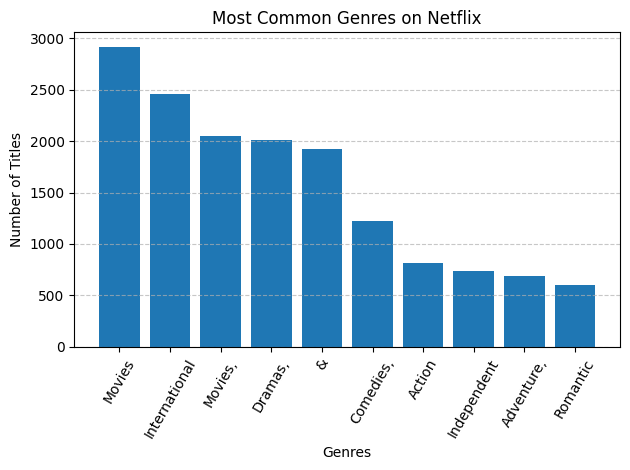

In [50]:
plt.bar(plott.index,plott.values)
plt.title('Most Common Genres on Netflix')
plt.xlabel('Genres')
plt.ylabel('Number of Titles')
plt.xticks(rotation=60, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### - Box plot: Movie durations

In [51]:
data.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Year
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,2021


## 🎭 6. People Analysis (Cast/Directors)

### - Who are the most frequently listed directors?

In [52]:
data['director'].value_counts().idxmax()

'Raúl Campos, Jan Suter'

#### - Which actors appear most often?

In [53]:
data['cast'].str.split(',').explode().value_counts().head(3)

cast
Anupam Kher    38
Om Puri        27
Boman Irani    25
Name: count, dtype: int64

#### - Are there directors who work more on movies vs shows?

In [54]:
data.groupby('type')['director'].count()

type
Movie      5185
TV Show     147
Name: director, dtype: int64

## 🌍 5. Geographic Insights

#### - Which countries produce the most Netflix content?

In [55]:
data['country'].str.split(', ').explode().value_counts().head(3)

country
United States     2485
India              940
United Kingdom     484
Name: count, dtype: int64

#### - How many titles come from India, US, UK, etc.?

In [56]:
data['country'].str.split(', ').explode().str.strip()

7        United States
7                Ghana
7         Burkina Faso
7       United Kingdom
7              Germany
             ...      
8801            Jordan
8802     United States
8804     United States
8805     United States
8806             India
Name: country, Length: 6879, dtype: object

In [57]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Year
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,360,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,2021


#### What is the distribution of movie durations?

In [58]:
data['duration'].describe().round(2)

count    5332.00
mean      101.97
std        29.43
min         8.00
25%        88.00
50%       100.00
75%       116.00
max       600.00
Name: duration, dtype: float64

#### Are longer movies linked to specific ratings?

In [59]:
data.groupby('duration')['rating'].count().sort_values(ascending=False)

duration
94     135
93     130
97     129
95     127
90     123
      ... 
229      1
253      1
237      1
280      1
600      1
Name: rating, Length: 193, dtype: int64

C:\Users\neera\AppData\Local\Temp\ipykernel_22460\606424028.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped_data, labels=labels, patch_artist=True)


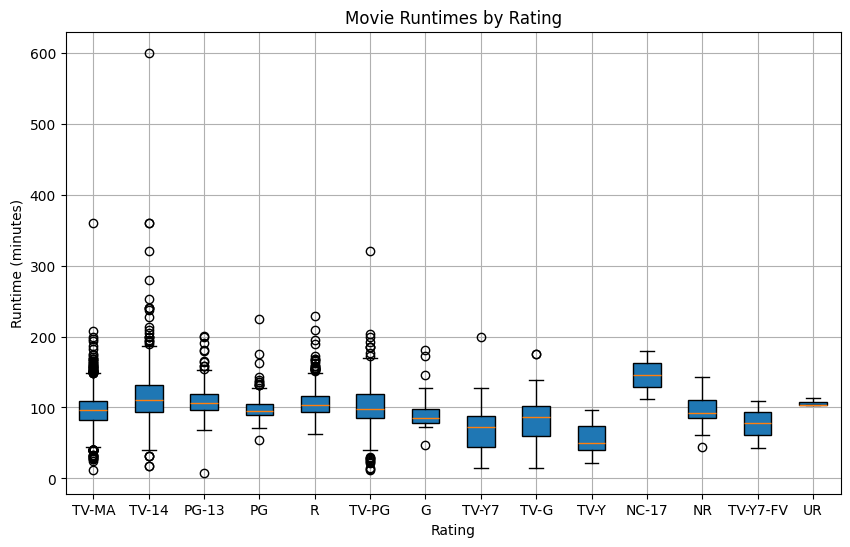

In [60]:
import matplotlib.pyplot as plt

# Group runtimes by rating
grouped_data = [data[data['rating'] == r]['duration'] for r in data['rating'].unique()]

# Labels in the same order
labels = data['rating'].unique()

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot(grouped_data, labels=labels, patch_artist=True)

plt.title('Movie Runtimes by Rating')
plt.xlabel('Rating')
plt.ylabel('Runtime (minutes)')
plt.grid(True)
plt.show()


#### - Do TV Shows vary a lot in season count?


In [61]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Year
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,360,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,2021


In [72]:
data.groupby('type')['duration'].apply(lambda x : x/25>=5).sort_values(ascending=False)

type         
Movie    7        True
         7360     True
         4024     True
         7837     True
         8272     True
                 ...  
         3720    False
         3718    False
         3717    False
         3715    False
TV Show  8599    False
Name: duration, Length: 5332, dtype: bool

###  Are certain genres more popular in certain countries?

In [78]:
data.groupby(['country','listed_in'])['listed_in'].count().sort_values(ascending=False)

country                                       listed_in                                       
United States                                 Stand-Up Comedy                                     202
India                                         Comedies, Dramas, International Movies              119
                                              Dramas, International Movies                        117
United States                                 Documentaries                                       111
India                                         Dramas, Independent Movies, International Movies    108
                                                                                                 ... 
United States, United Kingdom, Italy          Comedies, Dramas, International Movies                1
United States, United Kingdom, Japan          Comedies                                              1
United States, United Kingdom, Morocco        Dramas, Faith & Spirituality               

### Is there a trend toward specific ratings after 2020?

In [89]:
data['Year'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2009, 2008, 2010], dtype=int32)

In [97]:
data[data['Year']>=2020].groupby('Year')['rating'].count()

Year
2020    1194
2021     755
Name: rating, dtype: int64

###  What content was added during COVID (2020-2021)?

In [108]:
data[data['Year']>=2020].groupby('Year')['title'].count()

Year
2020    1194
2021     755
Name: title, dtype: int64